In [97]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
epoch_number=100
learning_rate=1

In [108]:
def Merge_weight(label,xy):    
    ############# reflect training data ###################

    z_1=[]
    for i in range(len(label)):
        j=1 if label[i]==1.0 else -1
        z_1.append(j)
        xy[i] *= j 
    z_1=np.array(z_1)
    z_1=z_1.reshape((len(z_1),1))
    ############ fight best wight ##################
    W=[0.1,0.1]  #initial W
    for epoch in range(epoch_number): #iterate epoch
        flag=0                        #check where there is update on W
        if epoch == epoch_number-1:   #if this is the last epoch
            min_JW=float("inf")
            Best_W=W
            for i in range(len(xy)): 
                if np.dot(xy[i],W)<0:       
                    W+=learning_rate*xy[i] 
                JW=abs(sum(np.minimum(np.sum(xy*W,axis=1),[0]*len(xy))))

                if JW<min_JW:
                    Best_W=W

        else:
            for i in range(len(xy)):   #iterate over all points
                if np.dot(xy[i],W)<0:    #if this point is misclassified

                    flag=1           #if there is update, set flag
                    W+=learning_rate*xy[i]   #update W
        if not flag: 
            Best_W=W
            break
    return Best_W,z_1


In [111]:
Syn1_train_data=np.loadtxt("synthetic1_train.csv", dtype=np.float, delimiter=",")
Syn1_test_data=np.loadtxt("synthetic1_test.csv", dtype=np.float, delimiter=",")
np.random.shuffle(Syn1_train_data)
Syn1_train_label=Syn1_train_data[:,-1]
Syn1_train_xy=Syn1_train_data[:,:-1]
Syn1_weight,z_1=Merge_weight(Syn1_train_label,Syn1_train_xy)
Syn1_test_xy=Syn1_test_data[:,:-1]
Syn1_test_label=Syn1_test_data[:,-1]
result = np.sum(Syn1_train_xy*Syn1_weight,axis=1)
count=0.0
for i in range(len(result)):
    if result[i]<0:
        count+=1.0
test_result = np.sum(Syn1_test_xy*Syn1_weight,axis=1)
number=0.0
#print test_result
for i in range(len(test_result)):
    if (test_result[i]<0 and Syn1_test_label[i]==1) or (test_result[i]>0 and Syn1_test_label[i]==2):
        number+=1.0

print "The Final weight for Syn1 is: %s"%Syn1_weight
print "The error for training set is: %s%%"% str(count/len(result)*100)
print "The error for testing set is: %s%%"% str(number/len(test_result)*100)

The Final weight for Syn1 is: [-43.17179  41.901  ]
The error for training set is: 2.0%
The error for testing set is: 3.0%


In [112]:
Syn2_train_data=np.loadtxt("synthetic2_train.csv", dtype=np.float, delimiter=",")
Syn2_test_data=np.loadtxt("synthetic2_test.csv", dtype=np.float, delimiter=",")
np.random.shuffle(Syn2_train_data)
Syn2_train_label=Syn2_train_data[:,-1]
Syn2_train_xy=Syn2_train_data[:,:-1]
Syn2_weight,z_2=Merge_weight(Syn2_train_label,Syn2_train_xy)
Syn2_test_xy=Syn2_test_data[:,:-1]
Syn2_test_label=Syn2_test_data[:,-1]
result = np.sum(Syn2_train_xy*Syn2_weight,axis=1)
count=0.0
for i in range(len(result)):
    if result[i]<0:
        count+=1.0
test_result = np.sum(Syn2_test_xy*Syn2_weight,axis=1)
number=0.0
#print test_result
for i in range(len(test_result)):
    if (test_result[i]<0 and Syn2_test_label[i]==1) or (test_result[i]>0 and Syn2_test_label[i]==2):
        number+=1.0

print "The Final weight for Syn2 is: %s"%Syn2_weight
print "The error for training set is: %s%%"% str(count/len(result)*100)
print "The error for testing set is: %s%%"% str(number/len(test_result)*100)

The Final weight for Syn2 is: [-1.2721  13.93228]
The error for training set is: 2.0%
The error for testing set is: 3.0%


In [114]:
train_label=np.loadtxt("label_train.csv", dtype=np.float, delimiter=",")
train_xy=np.loadtxt("feature_train.csv", dtype=np.float, delimiter=",")
train_label=train_label.reshape((len(train_label),1))

data= np.concatenate((train_xy,train_label),axis=1)
np.random.shuffle(data)

Syn3_train_label=data[:,-1]
Syn3_train_xy=data[:,:-1]


Syn3_weight,z_3=Merge_weight(Syn3_train_label,Syn3_train_xy)
Syn3_test_xy=np.loadtxt("feature_test.csv", dtype=np.float, delimiter=",")
Syn3_test_label=np.loadtxt("label_test.csv", dtype=np.float, delimiter=",")
result = np.sum(Syn3_train_xy*Syn3_weight,axis=1)
count=0.0
for i in range(len(result)):
    if result[i]<0:
        count+=1.0
test_result = np.sum(Syn3_test_xy*Syn3_weight,axis=1)
number=0.0
#print test_result
for i in range(len(test_result)):
    if (test_result[i]<0 and Syn3_test_label[i]==1) or (test_result[i]>0 and Syn3_test_label[i]==2):
        number+=1.0

print "The Final weight for Syn3 is: %s"%Syn3_weight
print "The error for training set is: %s%%"% str(count/len(result)*100)
print "The error for testing set is: %s%%"% str(number/len(test_result)*100)

The Final weight for Syn3 is: [-13.41021  11.07056]
The error for training set is: 0.0%
The error for testing set is: 1.0%


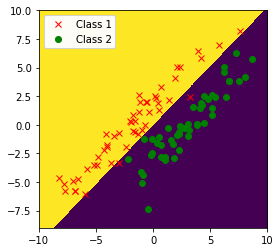

In [115]:
plotDecBoundaries(Syn1_train_xy*z_1,Syn1_train_label,Syn1_weight)

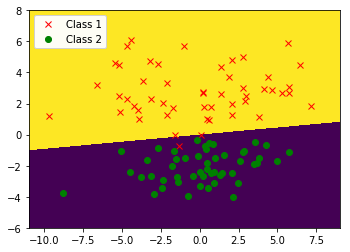

In [116]:
plotDecBoundaries(Syn2_train_xy*z_2,Syn2_train_label,Syn2_weight)

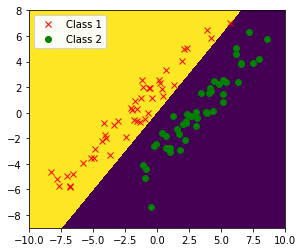

In [117]:
plotDecBoundaries(Syn3_train_xy*z_3,Syn3_train_label,Syn3_weight)

In [83]:
def plotDecBoundaries(training, label_train,weight):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # sample_mean: mean vector for each class
    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = np.dot(xy,weight)
    pred_label = (dist_mat>0)*1

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    plt.show()